## 라이브러리/데이터 불러오기

[캐글주소](https://www.kaggle.com/datasets/santoshd3/bank-customers)

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from imblearn.over_sampling import SMOTE

import tensorflow as tf

In [2]:
df = pd.read_csv('data/Churn Modeling.csv')

## 데이터셋 확인하기

In [3]:
df.shape

(10000, 14)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [5]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [6]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [7]:
df.describe(include='object')

,Surname,Geography,Gender
count,10000,10000,10000
unique,2932,3,2
top,Smith,France,Male
freq,32,5014,5457


### 히스토그램 확인하기

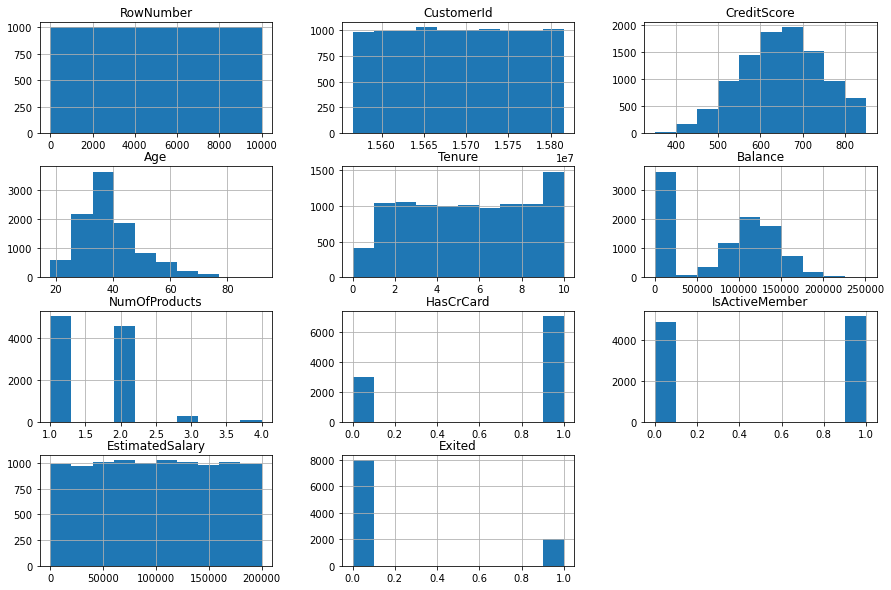

In [8]:
_= df.hist(figsize=(15,10))

### 필요없는 변수 드랍하기
각 고객들에 대한 개별적인 고유값은 필요가 없으므로 드랍한다

In [9]:
df=df.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)
df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


### 결측치 확인하기

In [10]:
df.isnull().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

* 결측치가 없음

### 중복값 확인하기

In [11]:
dup= df.duplicated().sum()
print('중복값 개수:',dup)

중복값 개수: 0


* 중복값 없음

### 상관관계 확인하기

<AxesSubplot:>

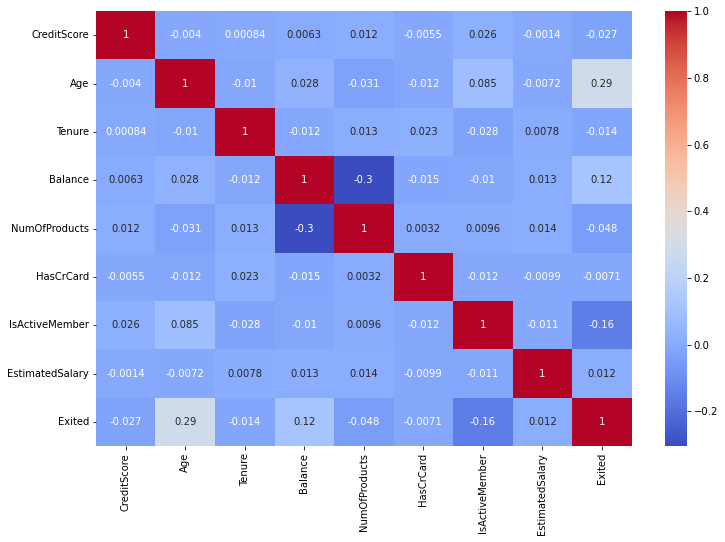

In [12]:
#전체에 대한 상관관계 확인
corr = df.corr()
plt.figure(figsize=(12,8))
sns.heatmap(corr, annot=True, cmap='coolwarm')

In [13]:
# 타겟 변수와 인풋 변수들간의 상관관계 확인
corr = df.corr()['Exited']
corr

CreditScore       -0.027094
Age                0.285323
Tenure            -0.014001
Balance            0.118533
NumOfProducts     -0.047820
HasCrCard         -0.007138
IsActiveMember    -0.156128
EstimatedSalary    0.012097
Exited             1.000000
Name: Exited, dtype: float64

### 타겟 변수 분포 확인하기

<AxesSubplot:xlabel='Exited', ylabel='count'>

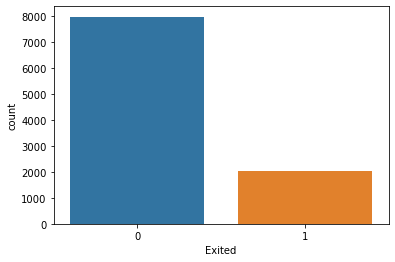

In [14]:
sns.countplot(data=df, x='Exited')

* 꽤나 불균형하다는 것을 확인할 수 있음
* 추후에 Over 혹은 Under sampling이 필요할 것으로 보인다.

## Feature Engineering

In [15]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


* Geogrphy와 Gender른 원핫 인코딩해준다.
* CreditScore 같은 경우 qcut을 이용하여 범위를 나누어 줄 수도 있을 것 같다.

### Geography와 Gender 원핫 인코딩하기

In [16]:
df['Geography'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [17]:
ohe=pd.get_dummies(df[['Geography', 'Gender']])

In [18]:
df[ohe.columns.tolist()]=pd.get_dummies(df[['Geography', 'Gender']])

In [19]:
df=df.drop(['Geography','Gender'], axis=1)
df

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,1,0,0,1,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,0,1,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,1,0,0,1,0
3,699,39,1,0.00,2,0,0,93826.63,0,1,0,0,1,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,1,0,0,0,1
9996,516,35,10,57369.61,1,1,1,101699.77,0,1,0,0,0,1
9997,709,36,7,0.00,1,0,1,42085.58,1,1,0,0,1,0
9998,772,42,3,75075.31,2,1,0,92888.52,1,0,1,0,0,1


## 딥러닝 모델링

### 데이터 나누기

In [20]:
label_name='Exited'
X=df.drop(columns=label_name)
y=df[label_name]
X.shape, y.shape

((10000, 13), (10000,))

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((8000, 13), (2000, 13), (8000,), (2000,))

### 딥러닝 레이어 만들기

In [22]:
#입력 데이터 수
input_shape = len(X_train.keys())
input_shape

13

In [23]:
#레이어 구성하기
model = tf.keras.models.Sequential([
                                  tf.keras.layers.Dense(128, activation='relu',input_shape=[input_shape]),
                                  tf.keras.layers.Dense(64, activation='relu'),
                                  tf.keras.layers.Dense(32, activation='relu'),
                                  tf.keras.layers.Dropout(0.2),
                                  tf.keras.layers.Dense(16, activation='relu'),
                                  tf.keras.layers.Dropout(0.2),
                                  tf.keras.layers.Dense(1, activation='sigmoid')
                                  ])
model

KeyboardInterrupt: 

### 모델 컴파일 하기

In [ ]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

* 이진 분류 이므로 손실함수는 binary_crossentropy 사용
* 옵티마이저는 제일 무난한 아담 사용
* 지표는 정확도사용

In [ ]:
# 모델 요약하기
model.summary()

### 학습시키기

In [ ]:
class PrintDot(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs):
    if epoch % 100 == 0: print('')
    print('.', end='')

early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=100)

In [ ]:
# 학습하기
history = model.fit(X_train, y_train, epochs=100, validation_split = 0.2, verbose=0,callbacks=[early_stop] )

In [ ]:
df_hist=pd.DataFrame(history.history)

In [ ]:
df_hist

### 학습결과 시각화

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,4))
_=df_hist[['loss', 'val_loss']].plot(ax=axes[0])

_=df_hist[['accuracy', 'val_accuracy']].plot(ax=axes[1])

### 예측하기

In [ ]:
y_pred=model.predict(X_test).flatten()
y_pred.shape

In [ ]:
# 특정값 이상이면 True 아니면 False
y_predict=(y_pred>0.5).astype(int)
y_predict

### 평가하기

In [ ]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print('\n테스트 정확도:', test_acc)

## 개선해보기

정확도가 그렇게 낮은건 아니지만, 이 데이터셋을 올린 사람에 의하면 85%까지는 나올 수 있다고 했으므로 개선을 해보도록 하자!
* 우선 타겟변수가 한쪽으로 몰려있는 현상이 있다.
* SMOTE를 통해 어느정도 비율을 맞춰주도록 하자!

SMOTE를 이용하는 이유는 소주자를 오버 샘플리하는 기법이기 때문이다.

In [ ]:
sm=SMOTE(random_state=42)
X_resample, y_resample = sm.fit_resample(X,y)

In [ ]:
X.shape, X_resample.shape

In [ ]:
y.shape, y_resample.shape

* 원본 데이터보다 5926개의 데이터가 더 생성되었음을 확인해볼 수 있다.

In [ ]:
y.value_counts()

In [ ]:
y_resample.value_counts()

* 원본 데이터보다 타겟이 0인 5926개의 데이터가 더 생겼다고 볼 수 있다.

정확한 비교를 위해 위에서 생성한 모델과 동일한 조건으로 모델을 구성한다.

In [ ]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X_resample, y_resample, test_size=0.2, random_state=42,stratify=y_resample)

In [ ]:
#모델
model = tf.keras.models.Sequential([
                                  tf.keras.layers.Dense(128, activation='relu',input_shape=[input_shape]),
                                  tf.keras.layers.Dense(64, activation='relu'),
                                  tf.keras.layers.Dense(32, activation='relu'),
                                  tf.keras.layers.Dropout(0.2),
                                  tf.keras.layers.Dense(16, activation='relu'),
                                  tf.keras.layers.Dropout(0.2),
                                  tf.keras.layers.Dense(1, activation='sigmoid')
                                  ])
model

In [ ]:
#컴파일링
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
# 학습하기
history = model.fit(X1_train, y1_train, epochs=100, validation_split = 0.2, verbose=0,callbacks=[early_stop] )

In [ ]:
df_hist1=pd.DataFrame(history.history)

In [ ]:
df_hist1

In [ ]:
# 학습 결과 시각화
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,4))
_=df_hist1[['loss', 'val_loss']].plot(ax=axes[0])

_=df_hist1[['accuracy', 'val_accuracy']].plot(ax=axes[1])

In [ ]:
# 예측해보기
y1_pred=model.predict(X1_test).flatten()
y1_pred.shape

In [ ]:
y1_predict=(y1_pred>0.5).astype(int)
y1_predict

In [ ]:
test1_loss, test1_acc = model.evaluate(X1_test, y1_test)
print('\n테스트 정확도:', test1_acc)

* 이 데이터셋의 경우 SMOTE를 하는 것이 오히려 악영향을 미치는 듯하다.
    * 예상되는 이유로는 대부분의 경우 1이고, 1과 0의 큰차이가 많이 있지는 않기 때문에 굳이 0에 해당하는 데이터를 늘리는 것은 오히려 혼돈을 초래하는 것 같다는 추측이다

### 다른 함수들을 이용하여 만들어보기

* train과  test를 scaling해보자
* 활성화 함수: selu
* unit을 줄여보자

In [ ]:
# scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [ ]:
model = tf.keras.models.Sequential([
                                  tf.keras.layers.Dense(6, activation='selu',input_shape=[input_shape]),
                                  tf.keras.layers.Dense(6, activation='selu'),
                                  tf.keras.layers.Dropout(0.1),
                                  tf.keras.layers.Dense(6, activation='selu'),
                                  tf.keras.layers.Dropout(0.1),
                                  tf.keras.layers.Dense(6, activation='selu'),
                                  tf.keras.layers.Dropout(0.1),
                                  tf.keras.layers.Dense(1, activation='sigmoid')
                                  ])
model

In [ ]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
history = model.fit(X_train, y_train, epochs=100, validation_split = 0.2, verbose=0,callbacks=[early_stop] )

In [ ]:
df_hist=pd.DataFrame(history.history)

In [ ]:
df_hist

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,4))
_=df_hist[['loss', 'val_loss']].plot(ax=axes[0])

_=df_hist[['accuracy', 'val_accuracy']].plot(ax=axes[1])

In [ ]:
# 예측해보기
y_pred=model.predict(X_test).flatten()
y_pred.shape

In [ ]:
y_predict=(y1_pred>0.5).astype(int)
y_predict

In [ ]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print('\n테스트 정확도:', test_acc)

* 여태까지 가장 좋은 성능을 내고 있다